In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
BASE_PATH = "../results/"

In [3]:
df = pd.read_csv(f"{BASE_PATH}ecg.csv")
df = df.sample(frac = 1)

In [4]:
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the "Senior Management" 
# column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Name,Age,Gender,Mean_RR,STD_RR,RMS_RR,Mean_HR,STD_HR,RMSSD,Status
31,Vasu,35,1,704.219040,25.576193,704.683332,85.200764,3.113157,8.484505,0
60,Nagaraj N,38,1,646.535971,27.526883,647.121697,92.802261,3.767410,8.171400,1
29,Ragavendra,36,1,872.250000,10.556396,872.313877,68.787618,0.836170,14.227740,0
59,Srinivas,40,1,760.399685,21.858622,760.713797,78.905872,2.201125,11.056939,0
26,Palaniswamy,47,1,892.795775,310.769185,945.336861,67.204619,19.834819,362.161272,0


In [5]:
df = df.sample(frac = 1)
X = df.drop(['Name', 'Age', 'Gender', 'Status'], axis=1).copy()
y = df['Status'].copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [9]:
params = {
        "ccp_alpha": [ 0.01, 0.05, 0.1, 0.5, 0.9, 1, 5, 9, 10, 50, 100],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,20, 50, 100],
        'n_estimators': [50, 80, 100, 200, 300],
        'criterion' : ["gini", "entropy", "log_loss"],
        'min_samples_split' : [2, 5, 10, 20, 50],
        'min_samples_leaf' : [1, 5, 10, 20, 50],
        'max_leaf_nodes': [10, 20, 50, 100, 200, 500, 1000],
        'max_samples' : [1, 5, 10, 20, 50, 100],
        'n_jobs' : [-1]
    }

In [10]:
rfc = RandomForestClassifier()
rfcCV = GridSearchCV(estimator=rfc, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
rfcCV.fit(X_train, y_train)

Fitting 5 folds for each of 2252250 candidates, totalling 11261250 fits


In [25]:
opt_alpha_random_forest = rfcCV.best_params_['ccp_alpha']
print(f"Optimum Alpha value: {opt_alpha_random_forest}")

Optimum Alpha value: 0.05


In [26]:
clf = RandomForestClassifier(max_depth=6, random_state=1, ccp_alpha=opt_alpha_random_forest)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

In [27]:
print(f"Accuracy: {int(accuracy_score(y_test, y_pred_test)*100)}%")

Accuracy: 71%


In [28]:
confusion_matrix(y_test, y_pred_test)

array([[27,  0],
       [11,  1]], dtype=int64)

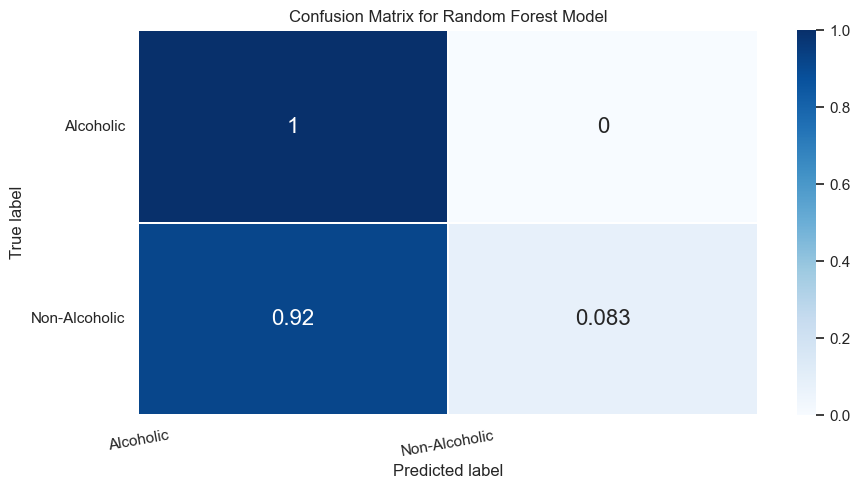

In [29]:
confusion_matrix(y_test, y_pred_test)
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':16},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Alcoholic', 'Non-Alcoholic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=10)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()